In [1]:
# Local imports
import os
import glob
import re
import sys
import argparse

# Third-party imports
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import matplotlib
import cartopy.crs as ccrs
import iris
import iris.coord_categorisation as coord_cat
import iris.plot as iplt
import scipy
import pdb
import datetime
import iris.quickplot as qplt

# Import dictionaries and functions from my module
import dictionaries as dic
import functions as fnc

In [2]:
# Set up the variables
model = "HadGEM3-GC31-MM"
variable = "psl"
region = "global"
season = "DJFM"
forecast_range = "2-9"
start_year = "1960"
end_year = "2022"
obs_path = dic.obs_path
models = dic.psl_full_models
base_dir = dic.base_dir_skm_pro
output_dir = dic.plots_dir_canari
save_dir = dic.save_dir

# Set up the matched variable
tas_models = dic.tas_models
match_var_tas = "tas"

In [3]:
# Process the observations
obs_anomaly = fnc.read_obs(variable, region, forecast_range,
                            season, obs_path, start_year, end_year)

/apps/jasmin/jaspy/miniconda_envs/jaspy3.10/m3-4.9.2/envs/jaspy3.10-m3-4.9.2-r20220721/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


In [4]:
# Load and process the model data
datasets = fnc.load_data(dic.base_dir_skm_pro, models, variable, region,
                            forecast_range, season)

# Process the model data
model_anomaly, _ = fnc.process_data(datasets, variable)

Skipping file /home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/global/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_global_2-9_DJFM-r7i2.nc
Skipping file /home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/global/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_global_2-9_DJFM-r6i2.nc
Skipping file /home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/global/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_global_2-9_DJFM-r9i2.nc
Skipping file /home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/global/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_global_2-9_DJFM-r8i2.nc
Skipping file /home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/global/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_global_2-9_DJFM-r10i2.nc
Skipping file /home/users/benhutch/skill-maps-processed-data/psl/FGOALS-f3-L/global/years_2-9/DJFM/outputs/mergetime/mergetime_FGOALS-f3-L_psl_global_2-9_DJFM-r3i1.nc
Skipping file /ho

In [5]:
# Make sure that the model and obs have the same time period
model_anomaly = fnc.constrain_years(model_anomaly, models)

# Remove years containing nans from the observations and align the time periods
# for the observations and model
obs_anomaly, model_anomaly = fnc.remove_years_with_nans(obs_anomaly, model_anomaly, models)

No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
1960 all NaN values for this year
1961 all NaN values for this year
1962 all NaN values for this year
1963 all NaN values for this year
1964 no NaN values for this year
1965 no NaN values for this year
1966 no NaN values for this year
1967 no NaN values for this year
1968 no NaN values for this year
1969 no NaN values for this year
1970 no NaN values for this year
1971 no NaN values for this year
1972 no NaN values for this year
1973 no NaN values for this year
1974 no NaN values for this year
1975 no NaN values for this year
1976 no NaN values for this year
1977 no NaN values for this year
1978 no NaN values

In [6]:
# Calculate the NAO index
obs_nao, model_nao = fnc.calculate_nao_index_and_plot(obs_anomaly, model_anomaly, models, 
                                                        variable, season, forecast_range, 
                                                            output_dir, plot_graphics=False)

Calculating NAO index using standard definition
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r3i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r7i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r6i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r4i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r2i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r8i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r5i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r1i1p1f1
Calculating model NAO index using default definition
calculated NAO for model MPI-ESM1-2-HR member r1i1p

In [7]:
# Test the NAO rescaling function
rescaled_nao, ensemble_mean_nao, ensemble_members_nao = fnc.rescale_nao(obs_nao, model_nao, models, season,
                                                                        forecast_range, output_dir, lagged=False)

Converting obs_nao to a numpy array
Rescaling NAO indices for 1966
Cross-validation case for the first year
Removing the first year and: 1 years forward
Cross-validation indices: [0 1]
Rescaling NAO indices for 1967
Cross-validation case for any other year
Removing the year and: 1 years backward
Cross-validation indices: [0 1 2]
Rescaling NAO indices for 1968
Cross-validation case for any other year
Removing the year and: 1 years backward
Cross-validation indices: [1 2 3]
Rescaling NAO indices for 1969
Cross-validation case for any other year
Removing the year and: 1 years backward
Cross-validation indices: [2 3 4]
Rescaling NAO indices for 1970
Cross-validation case for any other year
Removing the year and: 1 years backward
Cross-validation indices: [3 4 5]
Rescaling NAO indices for 1971
Cross-validation case for any other year
Removing the year and: 1 years backward
Cross-validation indices: [4 5 6]
Rescaling NAO indices for 1972
Cross-validation case for any other year
Removing the 

In [8]:
# Perform the NAO matching for tas
matched_tas_ensemble_mean = fnc.nao_matching_other_var(rescaled_nao, model_nao,
                                                        models, match_var_tas, dic.base_dir_skm_pro, 
                                                            tas_models, obs_path, region,
                                                                season, forecast_range, start_year, 
                                                                    end_year, output_dir, save_dir, lagged=False,
                                                                        no_subset_members=20)

# Set up the no_ensemble_members variable
no_ensemble_members = 20

The file tas_global_DJFM_2-9_1960-2022_matched_var_ensemble_mean.nc already exists
Loading the file


In [9]:
print(matched_tas_ensemble_mean['__xarray_dataarray_variable__'].values)

[[[-0.57368547 -0.56379092 -0.59730911 ... -0.5704506  -0.5967232
   -0.56679076]
  [-0.53204572 -0.57282335 -0.58483046 ... -0.50087202 -0.57417142
   -0.56425095]
  [-0.65174258 -0.6447655  -0.63053435 ... -0.65460664 -0.66639024
   -0.6503197 ]
  ...
  [-1.75495458 -1.74965739 -1.74939954 ... -1.74644315 -1.75333333
   -1.75510025]
  [-1.70411754 -1.69889295 -1.69405138 ... -1.70963895 -1.70919645
   -1.70594025]
  [-1.66782761 -1.66490865 -1.66379011 ... -1.66563034 -1.6665771
   -1.66582561]]

 [[-0.61899185 -0.62303239 -0.62136841 ... -0.66042864 -0.63035661
   -0.61566162]
  [-0.56651533 -0.59221876 -0.60087508 ... -0.61581117 -0.5811249
   -0.59079742]
  [-0.56345904 -0.58006746 -0.56215441 ... -0.57822573 -0.58299941
   -0.57565612]
  ...
  [-1.70346451 -1.69553065 -1.68787539 ... -1.73017728 -1.72116244
   -1.71326983]
  [-1.66738582 -1.66643906 -1.66798246 ... -1.67443919 -1.670874
   -1.66873932]
  [-1.70780563 -1.71038973 -1.71359479 ... -1.7012161  -1.70386887
   -1.70682

In [10]:
# Now we want to calculate the spatial correlations between the matched variable and its observations
# First we need to process the observations
obs_tas = fnc.read_obs(match_var_tas, region, forecast_range,
                        season, obs_path, start_year, end_year)

# Remove years containing nans from the observations and align the time periods
obs_tas, matched_tas_ensemble_mean = fnc.remove_years_with_nans(obs_tas, matched_tas_ensemble_mean, 
                                                                tas_models, NAO_matched=True)

/apps/jasmin/jaspy/miniconda_envs/jaspy3.10/m3-4.9.2/envs/jaspy3.10-m3-4.9.2-r20220721/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


NAO_matched is True
Checking for NaN values in the xarray dataset
1966 no NaN values for this year
1967 no NaN values for this year
1968 no NaN values for this year
1969 no NaN values for this year
1970 no NaN values for this year
1971 no NaN values for this year
1972 no NaN values for this year
1973 no NaN values for this year
1974 no NaN values for this year
1975 no NaN values for this year
1976 no NaN values for this year
1977 no NaN values for this year
1978 no NaN values for this year
1979 no NaN values for this year
1980 no NaN values for this year
1981 no NaN values for this year
1982 no NaN values for this year
1983 no NaN values for this year
1984 no NaN values for this year
1985 no NaN values for this year
1986 no NaN values for this year
1987 no NaN values for this year
1988 no NaN values for this year
1989 no NaN values for this year
1990 no NaN values for this year
1991 no NaN values for this year
1992 no NaN values for this year
1993 no NaN values for this year
1994 no Na

In [11]:
print(type(matched_tas_ensemble_mean))

<class 'xarray.core.dataset.Dataset'>


In [12]:
# Now we can calculate the spatial correlations
rfield, pfield, \
    obs_lons_converted, lons_converted, \
        _ = fnc.calculate_spatial_correlations(obs_tas,
                                                                            matched_tas_ensemble_mean, 
                                                                                tas_models, 
                                                                                    match_var_tas, NAO_matched=True)

the type of model_data is: <class 'xarray.core.dataset.Dataset'>


observed data shape (53, 72, 144)
model data shape (53, 72, 144)


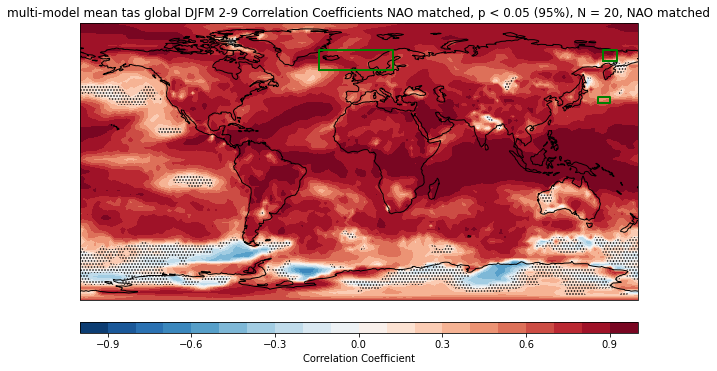

In [13]:
# Now plot the correlations
fnc.plot_correlations(tas_models, rfield, pfield, obs_tas,
                        match_var_tas, region, season, forecast_range,
                            output_dir, obs_lons_converted, lons_converted,
                                azores_grid=dic.azores_grid, iceland_grid=dic.iceland_grid,
                                    uk_n_box=dic.uk_n_box, uk_s_box=dic.uk_s_box, 
                                        ensemble_members_count=no_ensemble_members, NAO_matched=True)